<center><h1>YouTube Comments Text Report</h1></center><br>
EMAT 22110 - Data in Emerging Media and Technology <br>
Author: Hannah Haswell <br>
Created: 3/30/21 <br>
Last Updated: 5/6/21

# Purpose

The purpose of this assignment is to analyze Youtube Comments about the COVID-19 vaccination.I specifically want to analyze what COVID-19 vaccine shows up the most in YouTube comments: Moderna or Pfizer. This will then lead me to the best decision of what COVID-19 vaccine is the most popular in the media and in the end determine which one I may get.


## 1. Overview

My <b>hypothesis</b> for this report is: The word Moderna will show up the most in YouTube comments, therefore Moderna is the most popular vaccine in the media. Below, I am importing the libraires I will be using throughout this report as well as loading in my data from my "YouTubeVaccination_Dec14-Dec26_2021_fixed" file.

In [9]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats

In [10]:
YTVac = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\YouTubeVaccination_Dec14-Dec26_2021_fixed.csv")
YTVac.head()

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT


## 2. The Data

I got this data off of Blackboard from my professor, Dr. David Silva. The Below, I am pulling out the keys in the this data set. I found out that the keys of this data set are: 'Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author', 'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type', 'Page Type Name', 'Pub Type.'I also founf out that the data type of this file is an object.

In [11]:
YTVac.keys()

Index(['Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author',
       'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type',
       'Page Type Name', 'Pub Type'],
      dtype='object')

## 3. Data Preparation

Below, I am making sure the language of the YouTube comments are all in the English language. From here, I am going to prepthe data to be ready to analyze the keywords: Moderna, Pfizer, and Johnson & Johnson.

In [12]:
YTVac['Language'].head(20)

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     en
9     en
10    en
11    en
12    en
13    en
14    en
15    en
16    en
17    en
18    en
19    en
Name: Language, dtype: object

In [13]:
YTVac["Full Text"][12]

'@Krish Soni , I am assuming that English isn\'t your first language. Let me break down my comment: - The vaccine should be tested on animals. (You have taken this statement literally, and thus feel anger) -That\'s why it they should inject the politicians before anyone else. (I am now equating animals to politicians, and suggesting that they are nothing more than animals, and that they, the politicians should be injected first) - perhaps a double-dose? ( This exemplifies no contempt for politicians by suggesting to double the dosage for them.) As much as I commend for your fight against animal experimentation, I fear that perhaps you should refrain from commenting in English as you haven\'t grasped the nuances of English humour. And for you edification, and I have taken the liberty to correct your post: "An animal is also a living organism. Let\'s test on you, and see how you would feel." Notice the articles \'a\' and \'an\', and the use of the modal verb \'would\' in the subjunctive 

Below, I am making sure all of the comments are in the English language so that I can understand them.

In [14]:
en_only = YTVac.loc[YTVac['Language'] == 'en']
en_only

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,http://www.youtube.com/all_comments?v=JMEK0-zO...,reply,YouTube,VCOMMENT
12487,12/13/2020 0:11,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Damoreah Mitchell,NaN,How is this women the first person to get the ...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,reply,YouTube,VCOMMENT
12488,12/13/2020 0:07,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=XWG_Jypo...,youtube.com,youtube,en,Adelaide Hemlock,NaN,Breast cancer survivor: good question! Iâ€™ve ...,http://www.youtube.com/all_comments?v=XWG_Jypo...,reply,YouTube,VCOMMENT
12489,12/13/2020 0:02,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=tG7CzK5J...,youtube.com,youtube,en,Flumazenil,NaN,Panel members first to get the vaccine.,http://www.youtube.com/all_comments?v=tG7CzK5J...,reply,YouTube,VCOMMENT


In [15]:
en_only['Full Text'].head()

0    I got the Moderna vaccine, hereâ€™s my list of...
1    @Charlotte Haggerty Do you really believe ever...
2    I hate it when they say "You don't want a covi...
3    @Sweet Heart Well, Quantas, an Australian airl...
4    @AngryAngy Here they recommend a flu shot duri...
Name: Full Text, dtype: object

In [16]:
en_only['text_lower'] = [x.lower() for x in en_only['Full Text']]
en_only['text_lower'].head(20)

0     i got the moderna vaccine, hereâ€™s my list of...
1     @charlotte haggerty do you really believe ever...
2     i hate it when they say "you don't want a covi...
3     @sweet heart well, quantas, an australian airl...
4     @angryangy here they recommend a flu shot duri...
5     we don't need a corona vaccine, we need a come...
6     i had no idea of who this guy was prior to thi...
7     @angryangy zero medical test is done before se...
8     @justin kirschenman i don't know about your lo...
9     remember when the french scientist said test a...
10    @angryangy i've only said to limit vaccines an...
11    use your brain please , samiitb so many people...
12    @krish soni , i am assuming that english isn't...
13    the south african variant is the one to keep y...
14                part of the satan gates vaccine club!
15    enough of the lies already. it is patently rid...
16    @angryangy america has a different schedule. a...
17    i love the jre, but joe is pretty careless

In [17]:
en_only['Full Text'][1]

'@Charlotte Haggerty Do you really believe everything your told? No, the vaccines will not end the pandemic. Herd immunization is what will do it. However, they will claim that it is the vaccine that did it. The virus will be gone by August, btw.'

Below, I am importing additional libraries to do more functions for this report.

In [18]:
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hhasw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
en_only['tokens'] = [tk.word_tokenize(x) for x in en_only['text_lower']]
en_only['tokens'].head(5)

0    [i, got, the, moderna, vaccine, ,, hereâ€™s, m...
1    [@, charlotte, haggerty, do, you, really, beli...
2    [i, hate, it, when, they, say, ``, you, do, n'...
3    [@, sweet, heart, well, ,, quantas, ,, an, aus...
4    [@, angryangy, here, they, recommend, a, flu, ...
Name: tokens, dtype: object

In [20]:
en_only['tokens'][2]

['i',
 'hate',
 'it',
 'when',
 'they',
 'say',
 '``',
 'you',
 'do',
 "n't",
 'want',
 'a',
 'covid',
 'vaccine',
 '?',
 'well',
 ',',
 'it',
 'worked',
 'for',
 'smallpox',
 'and',
 'polio',
 '!',
 '!',
 '!',
 "''",
 '.',
 'yeah',
 'but',
 'here',
 "'s",
 'the',
 'difference',
 ':',
 'covid',
 'is',
 "n't",
 'even',
 '0.1',
 '%',
 'as',
 'deadly',
 'as',
 'smallpox',
 'for',
 'example',
 '.',
 'that',
 "'s",
 'my',
 'issue',
 'with',
 'it',
 '.',
 'i',
 "'m",
 'definitely',
 'not',
 'against',
 'vaccines',
 ',',
 'it',
 'would',
 'be',
 'stupid',
 'to',
 'be',
 'against',
 'such',
 'a',
 'great',
 'advancement',
 'of',
 'mankind',
 '.',
 'but',
 'should',
 'we',
 'vaccinate',
 'ourselves',
 'against',
 'everything',
 '?',
 'i',
 'mean',
 'cmon',
 '...',
 'i',
 'support',
 'covid',
 'vaccinations',
 'for',
 'people',
 'older',
 'than',
 '65',
 'etc',
 'but',
 'definitely',
 'not',
 'for',
 'people',
 'between',
 'the',
 'ages',
 'of',
 '0-35',
 '...']

Below, I am importing the library I need for stopwords as well as filtering my stopwords.

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hhasw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
len(stopwords.words('english'))

179

In [23]:
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s")
len(mystopwords)

181

In [24]:
filtered = []
for i in en_only['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
en_only['filtered'] = filtered

In [25]:
en_only['filtered'][2]

['hate',
 'say',
 '``',
 'want',
 'covid',
 'vaccine',
 '?',
 'well',
 ',',
 'worked',
 'smallpox',
 'polio',
 '!',
 '!',
 '!',
 "''",
 '.',
 'yeah',
 'difference',
 ':',
 'covid',
 'even',
 '0.1',
 '%',
 'deadly',
 'smallpox',
 'example',
 '.',
 'issue',
 '.',
 "'m",
 'definitely',
 'vaccines',
 ',',
 'would',
 'stupid',
 'great',
 'advancement',
 'mankind',
 '.',
 'vaccinate',
 'everything',
 '?',
 'mean',
 'cmon',
 '...',
 'support',
 'covid',
 'vaccinations',
 'people',
 'older',
 '65',
 'etc',
 'definitely',
 'people',
 'ages',
 '0-35',
 '...']

Below, I am taking out the punctuation in the words I am filtering.

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
no_punct = []
for i in en_only['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
en_only['no_punct'] = no_punct
en_only['no_punct'][2]

['hate',
 'say',
 '``',
 'want',
 'covid',
 'vaccine',
 'well',
 'worked',
 'smallpox',
 'polio',
 "''",
 'yeah',
 'difference',
 'covid',
 'even',
 '0.1',
 'deadly',
 'smallpox',
 'example',
 'issue',
 "'m",
 'definitely',
 'vaccines',
 'would',
 'stupid',
 'great',
 'advancement',
 'mankind',
 'vaccinate',
 'everything',
 'mean',
 'cmon',
 '...',
 'support',
 'covid',
 'vaccinations',
 'people',
 'older',
 '65',
 'etc',
 'definitely',
 'people',
 'ages',
 '0-35',
 '...']

Below, I am using a frequency function to determine the usage amount of the words and the amount of comments.

In [28]:
freq1 = [FreqDist(x) for x in en_only['no_punct']]
en_only['freqs1'] = freq1
en_only['freqs1']

0        {'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...
1        {'charlotte': 1, 'haggerty': 1, 'really': 1, '...
2        {'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...
3        {'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...
4        {'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...
                               ...                        
12486    {'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...
12487    {'women': 1, 'first': 3, 'person': 2, 'get': 1...
12488    {'breast': 1, 'cancer': 1, 'survivor': 1, 'goo...
12489    {'panel': 1, 'members': 1, 'first': 1, 'get': ...
12490    {'tom': 1, 'r': 1, 'wo': 1, 'return': 1, 'easi...
Name: freqs1, Length: 12491, dtype: object

In [29]:
from collections import Counter

In [30]:
A = Counter(en_only['freqs1'][0])
B = Counter(en_only['freqs1'][1])
A + B

Counter({'got': 1,
         'moderna': 1,
         'vaccine': 2,
         'hereâ€™s': 1,
         'list': 1,
         'side': 1,
         'effects': 1,
         'https': 1,
         '//youtu.be/9swygynujao': 1,
         'charlotte': 1,
         'haggerty': 1,
         'really': 1,
         'believe': 1,
         'everything': 1,
         'told': 1,
         'vaccines': 1,
         'end': 1,
         'pandemic': 1,
         'herd': 1,
         'immunization': 1,
         'however': 1,
         'claim': 1,
         'virus': 1,
         'gone': 1,
         'august': 1,
         'btw': 1})

In [31]:
en_only['f1_counts'] = [Counter(x) for x in en_only['freqs1']]
en_only['f1_counts'][0]

Counter({'got': 1,
         'moderna': 1,
         'vaccine': 1,
         'hereâ€™s': 1,
         'list': 1,
         'side': 1,
         'effects': 1,
         'https': 1,
         '//youtu.be/9swygynujao': 1})

In [32]:
wordcount = Counter()
for i in en_only['f1_counts']:
    wordcount += i

In [33]:
len(wordcount)

31928

In [34]:
dict(wordcount)

{'got': 703,
 'moderna': 297,
 'vaccine': 17148,
 'hereâ€™s': 17,
 'list': 96,
 'side': 810,
 'effects': 889,
 'https': 4469,
 '//youtu.be/9swygynujao': 2,
 'charlotte': 13,
 'haggerty': 3,
 'really': 613,
 'believe': 754,
 'everything': 407,
 'told': 328,
 'vaccines': 2007,
 'end': 465,
 'pandemic': 868,
 'herd': 126,
 'immunization': 33,
 'however': 191,
 'claim': 118,
 'virus': 2699,
 'gone': 131,
 'august': 23,
 'btw': 48,
 'hate': 113,
 'say': 946,
 '``': 2989,
 'want': 1192,
 'covid': 2772,
 'well': 606,
 'worked': 83,
 'smallpox': 53,
 'polio': 150,
 "''": 2969,
 'yeah': 200,
 'difference': 88,
 'even': 1449,
 '0.1': 12,
 'deadly': 219,
 'example': 115,
 'issue': 137,
 "'m": 729,
 'definitely': 104,
 'would': 1867,
 'stupid': 207,
 'great': 380,
 'advancement': 3,
 'mankind': 17,
 'vaccinate': 137,
 'mean': 311,
 'cmon': 6,
 '...': 2515,
 'support': 118,
 'vaccinations': 167,
 'people': 4894,
 'older': 118,
 '65': 21,
 'etc': 321,
 'ages': 33,
 '0-35': 1,
 'sweet': 10,
 'heart':

In [35]:
type(wordcount)

collections.Counter

## 4. Data Visualization, Statistical Summaries and Analyses

In [91]:
YTVacdf = pd.DataFrame(data = YTVac)
YTVacdf

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",https://www.youtube.com/watch?v=sT80A5uPREolc=...,reply,YouTube,VCOMMENT
1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,reply,YouTube,VCOMMENT
3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,reply,YouTube,VCOMMENT
4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,reply,YouTube,VCOMMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,http://www.youtube.com/all_comments?v=JMEK0-zO...,reply,YouTube,VCOMMENT
12487,12/13/2020 0:11,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Damoreah Mitchell,NaN,How is this women the first person to get the ...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,reply,YouTube,VCOMMENT
12488,12/13/2020 0:07,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=XWG_Jypo...,youtube.com,youtube,en,Adelaide Hemlock,NaN,Breast cancer survivor: good question! Iâ€™ve ...,http://www.youtube.com/all_comments?v=XWG_Jypo...,reply,YouTube,VCOMMENT
12489,12/13/2020 0:02,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=tG7CzK5J...,youtube.com,youtube,en,Flumazenil,NaN,Panel members first to get the vaccine.,http://www.youtube.com/all_comments?v=tG7CzK5J...,reply,YouTube,VCOMMENT


Below, I tried pulling out pfizer and moderna to get the amount of times they were used, but could not figure out the word count.

In [95]:
YTVacdf = pd.DataFrame({
    'Full Text': ['moderna','pfizer']})
YTVacdf

,Full Text
0,moderna
1,pfizer


In [36]:
counts = pd.DataFrame.from_dict(dict(wordcount), orient='index')
counts

,0
got,703
moderna,297
vaccine,17148
hereâ€™s,17
list,96
...,...
//www.mdpi.com/1660-4601/17/22/8674,1
adventure,1
hindi,1
urdu,1


In [ ]:
counts = pd.DataFrame.from_dict(dict(wordcount), orient='index')
counts

Below it shows that Moderna came up 297 times.

In [37]:
counts = counts.rename(columns = {0: 'counts'})
counts

,counts
got,703
moderna,297
vaccine,17148
hereâ€™s,17
list,96
...,...
//www.mdpi.com/1660-4601/17/22/8674,1
adventure,1
hindi,1
urdu,1


Below, I did a count_sort to display a table to put the words used in order from the greatest to least count.

In [89]:
count_sort = counts.sort_values('counts', ascending = False)[:100]
count_sort

,counts
vaccine,17148
people,4894
https,4469
get,3195
``,2989
...,...
donâ€™t,616
really,613
2,612
put,609


Below, is a pyplot visualization that shows the words used the most in the comments to the least. As you can see the word vaccine was used the most as it should be with this dataset. You can also see that Pfizer is on this graph and Moderna is not. From this I am inferring that the word Pfizer is used more than Moderna.

In [54]:
from matplotlib import pyplot as plt

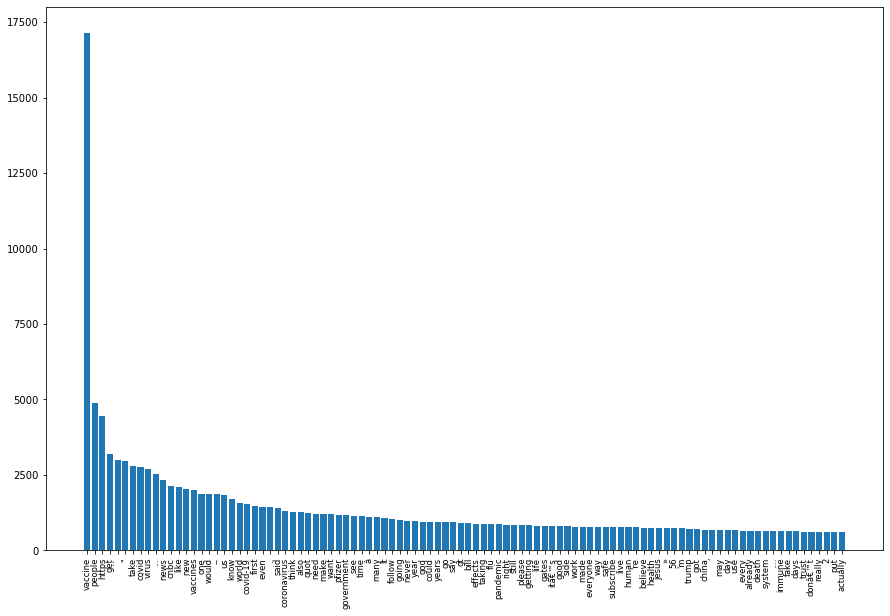

In [55]:
fig, ax0 = plt.subplots(figsize=(15,10))
ax0.bar(count_sort.index, count_sort['counts'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

Below, I am installing Vader to show only the positive comments about the COVID-19 vaccine.

In [41]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

In [43]:
analyzer = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

In [46]:
print(en_only['Full Text'][3])
print(analyzer.polarity_scores(en_only['Full Text'][3]))

@Sweet Heart Well, Quantas, an Australian airline, has already made it that no one can fly with them unless they have a stamp on their passport showing that they got the vaccine. What will be next? Maybe a tattoo on your hand. Look, China is already doing this with their citizens, controlling all their moves. You do something wrong, you get a strike, meaning that you won't be allowed in a supermarket, or public places, or in an airport. The vaccine is just one step to get there where they (the U.N. and their 2030 agenda....look it up) want you.
{'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'compound': 0.7906}


Below is showing negative (neg), neautral (neu), and positive (pos) comments about the vaccine.

In [47]:
en_only['vader_scores'] = [analyzer.polarity_scores(x) for x in en_only['Full Text']]
en_only['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co...
3     {'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com...
4     {'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co...
5     {'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp...
6     {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...
8     {'neg': 0.036, 'neu': 0.811, 'pos': 0.154, 'co...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.047, 'neu': 0.886, 'pos': 0.067, 'co...
11    {'neg': 0.246, 'neu': 0.719, 'pos': 0.035, 'co...
12    {'neg': 0.051, 'neu': 0.882, 'pos': 0.067, 'co...
13    {'neg': 0.135, 'neu': 0.778, 'pos': 0.087, 'co...
14    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
15    {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...
16    {'neg': 0.134, 'neu': 0.841, 'pos': 0.025, 'co...
17    {'neg': 0.064, 'neu': 0.638, 'pos': 0.298,

In [48]:
en_only['vader_scores'][2]['pos']

0.196

In [49]:
en_only['pos'] = [x['pos'] for x in en_only['vader_scores']]
en_only['pos']

0        0.000
1        0.000
2        0.196
3        0.123
4        0.103
         ...  
12486    0.127
12487    0.131
12488    0.178
12489    0.000
12490    0.000
Name: pos, Length: 12491, dtype: float64

Below, I am showing a subplot of the negative, neutral, and positve comments from VADER.

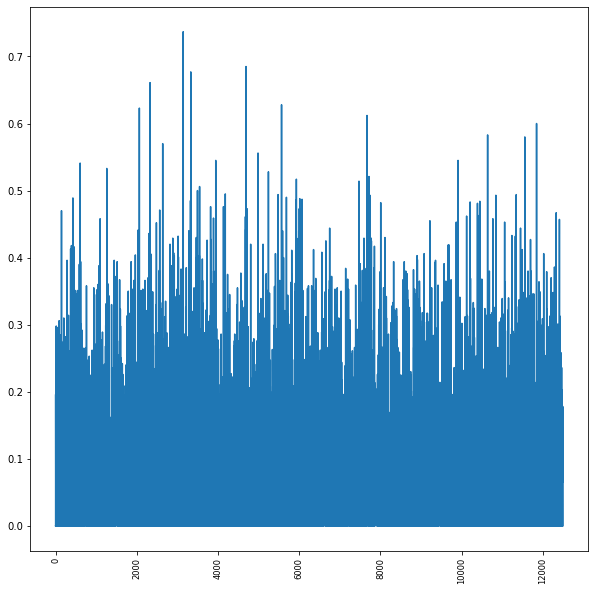

In [50]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(en_only['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

## 5. Conclusions, Limitations, and Next Steps

In conclusion, I found that the word Pfizer is used more than the word Moderna in the media. I inferred this because I could not figure out how to get the words Moderna and Pfizer out of the word count with the count included. This was definitely a limitation on my part and I wish I could have figured that out. I also found out that the word 'vaccine' was used the most in these YouTube comments.